In [119]:
# 라이브러리 import 영역

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [139]:
class GraphDraw:
    def __init__(self, ax, ax_copy, df1, df2, ylim_low, ylim_high, title):
        self.ax = ax
        self.ax_copy = ax_copy
        self.df1 = df1
        self.df2 = df2
        self.ylim_low = ylim_low
        self.ylim_high = ylim_high
        self.title = title

In [141]:
def draw_graph(gd):
    draw_ax(gd.ax, gd.df1)
    gd.ax_copy.plot(gd.df2.index, gd.df2.총지수, ls='--', marker='o', markersize=5, color='black', label='총지수')
    gd.ax_copy.plot(gd.df2.index, gd.df2.생활물가, ls='--', marker='o', markersize=5, color='brown', label='생활물가')
    gd.ax.set_ylim(gd.ylim_low, gd.ylim_high)
    gd.ax_copy.set_ylim(-15, 15)
    gd.ax.set_ylabel('승인건수')
    gd.ax.set_title(gd.title)
    gd.ax_copy.set_ylabel('생활물가')
    gd.ax.legend(loc='upper center')
    gd.ax_copy.legend(loc='best')

    return

In [121]:
def draw_ax(ax, df):
    x_term = df.index
    x = np.arange(len(x_term))  # the label locations
    width = 0.3  # the width of the bars
    multiplier = 0
    
    for attribute, measurement in df.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3)
        multiplier += 1
#         print(attribute, measurement)
        
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xticks(x + width, x_term)
    ax.set_xticklabels(x_term, rotation=75)
    ax.legend(loc='best')

In [122]:
# 데이터를 읽어 df1, df2 생성 부분
df = pd.read_csv('./월간_국내카드승인실적.csv', encoding='cp949')
df

,한국표준산업분류별,2019.01,2019.02,2019.03,2019.04,2019.05,2019.06,2019.07,2019.08,2019.09,...,2022.02,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11
0,도매 및 소매업,3241,2890,3339,3215,3335,3096,3277,3335,3346,...,4047,4606,4673,4879,4695,5000,5033,5025,5051,5047
1,운수업,161,135,144,145,149,141,152,141,128,...,64,82,108,124,122,115,119,128,135,137
2,숙박 및 음식점업,1032,935,1083,1049,1136,1087,1114,1151,998,...,780,939,1150,1316,1248,1314,1276,1192,1316,1208
3,사업시설관리 및 사업지원 서비스업,48,37,40,41,43,40,46,39,40,...,20,27,32,35,34,34,31,34,40,38
4,교육서비스업,122,115,129,113,125,119,133,144,121,...,135,145,136,152,146,154,171,150,145,148
5,보건업 및 사회복지 서비스업,423,370,390,404,408,379,421,414,375,...,449,479,481,492,479,496,504,477,496,512
6,"예술, 스포츠 및 여가관련 서비스업",80,82,110,114,127,126,123,125,116,...,80,116,148,169,161,160,148,154,169,145
7,"협회 및 단체, 수리 및 기타 개인 서비스업",163,145,170,168,175,163,169,173,157,...,145,169,191,193,185,192,187,184,198,192


In [123]:
col_name_app = df['한국표준산업분류별']

df1 = df.drop('한국표준산업분류별', axis=1)

df1 = df1.T
df1.columns = col_name_app
df_app = df1.drop(['도매 및 소매업', '운수업', '사업시설관리 및 사업지원 서비스업', '숙박 및 음식점업', '예술, 스포츠 및 여가관련 서비스업', '협회 및 단체, 수리 및 기타 개인 서비스업'], axis=1)

df_app.columns = ['교육', '보건복지']
df_app.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, 2019.01 to 2022.11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   교육      47 non-null     int64
 1   보건복지    47 non-null     int64
dtypes: int64(2)
memory usage: 1.1+ KB


In [124]:
df_app

,교육,보건복지
2019.01,122,423
2019.02,115,370
2019.03,129,390
2019.04,113,404
2019.05,125,408
2019.06,119,379
2019.07,133,421
2019.08,144,414
2019.09,121,375
2019.10,120,430


In [125]:
df_ap2 = df1.drop(['도매 및 소매업', '운수업', '사업시설관리 및 사업지원 서비스업', '협회 및 단체, 수리 및 기타 개인 서비스업', '교육서비스업', '보건업 및 사회복지 서비스업'], axis=1)
df_ap2.columns = ['여가/외식', '문화']
df_ap2

,여가/외식,문화
2019.01,1032,80
2019.02,935,82
2019.03,1083,110
2019.04,1049,114
2019.05,1136,127
2019.06,1087,126
2019.07,1114,123
2019.08,1151,125
2019.09,998,116
2019.10,1122,132


In [157]:
df2 = pd.read_csv('./월별_소비자물가_등락률.csv', encoding='cp949')
df2

,지수종류(1),2019.01,2019.01.1,2019.01.2,2019.02,2019.02.1,2019.02.2,2019.03,2019.03.1,2019.03.2,...,2022.08.2,2022.09,2022.09.1,2022.09.2,2022.10,2022.10.1,2022.10.2,2022.11,2022.11.1,2022.11.2
0,지수종류(1),전월비 (%),전년동월비(%),전년누계비(%),전월비 (%),전년동월비(%),전년누계비(%),전월비 (%),전년동월비(%),전년누계비(%),...,전년누계비(%),전월비 (%),전년동월비(%),전년누계비(%),전월비 (%),전년동월비(%),전년누계비(%),전월비 (%),전년동월비(%),전년누계비(%)
1,총지수,-0.1,0.8,0.8,0.4,0.5,0.6,-0.2,0.4,0.5,...,5.0,0.3,5.6,5.0,0.3,5.7,5.1,-0.1,5.0,5.1
2,생활물가지수,-0.3,0.4,0.4,0.6,0.0,0.2,-0.2,0.0,0.2,...,6.0,0.6,6.5,6.0,0.1,6.5,6.1,-0.3,5.5,6.0
3,신선식품지수,-0.2,1.2,1.2,2.1,-5.2,-2.2,-3.1,-3.0,-2.4,...,4.8,2.8,12.8,5.7,-6.1,11.4,6.3,-8.0,0.8,5.8
4,농산물및석유류제외지수,0.2,1.2,1.2,0.4,1.3,1.2,-0.1,0.9,1.1,...,3.8,0.3,4.5,3.9,0.6,4.8,4.0,0.3,4.8,4.1
5,식료품및에너지제외지수,0.2,1.0,1.0,0.5,1.1,1.1,-0.2,0.7,1.0,...,3.3,0.0,4.1,3.4,0.4,4.2,3.5,0.3,4.3,3.6


In [155]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 지수종류(1) to 식료품및에너지제외지수
Columns: 141 entries, 2019.01 to 2022.11.2
dtypes: object(141)
memory usage: 6.7+ KB
None


In [145]:
# df2.loc[ :, [len(col) <= 7 for col in df2.columns]]

,2019.01,2019.02,2019.03,2019.04,2019.05,2019.06,2019.07,2019.08,2019.09,2019.10,...,2022.02,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11
지수종류(1),,,,,,,,,,,,,,,,,,,,,
지수종류(1),전월비 (%),전월비 (%),전월비 (%),전월비 (%),전월비 (%),전월비 (%),전월비 (%),전월비 (%),전월비 (%),전월비 (%),...,전월비 (%),전월비 (%),전월비 (%),전월비 (%),전월비 (%),전월비 (%),전월비 (%),전월비 (%),전월비 (%),전월비 (%)
총지수,-0.1,0.4,-0.2,0.4,0.2,-0.2,-0.3,0.2,0.4,0.2,...,0.6,0.7,0.7,0.7,0.6,0.5,-0.1,0.3,0.3,-0.1
생활물가지수,-0.3,0.6,-0.2,0.3,0.5,-0.1,-0.8,0.3,0.8,0.4,...,0.9,1.2,0.8,1.0,0.8,0.4,-0.5,0.6,0.1,-0.3
신선식품지수,-0.2,2.1,-3.1,0.7,-3.0,-3.5,-2.5,3.4,7.6,-0.1,...,-0.1,-2.0,0.2,-2.0,-1.0,6.9,5.4,2.8,-6.1,-8.0
농산물및석유류제외지수,0.2,0.4,-0.1,0.2,0.1,-0.1,-0.2,0.1,0.0,0.2,...,0.4,0.2,0.6,0.7,0.4,0.1,0.2,0.3,0.6,0.3
식료품및에너지제외지수,0.2,0.5,-0.2,0.2,0.0,-0.1,0.2,0.1,-0.4,0.2,...,0.4,0.1,0.4,0.5,0.4,0.4,0.3,0.0,0.4,0.3


In [158]:
# df2 = df2.drop('지수종류(1)', axis=1)
df2.set_index('지수종류(1)', inplace=True)
df_idx = pd.DataFrame(df2.iloc[[1, 2]])
df_idx.loc[ :, [len(col) <= 7 for col in df_idx.columns]]
df_idx.rename(index={'생활물가지수':'생활물가'}, inplace=True)
df_idx = df_idx.T

# df_idx_T.columns = ['총지수', '생활물가']
# df_idx_T['cols'] = df_idx_T.index
# df_idx_T['cols'] = df_idx_T['cols'].apply(lambda x:len(x)<=7)
# df_idx = df_idx_T.loc[df_idx_T.cols, :]
# df_idx = df_idx.drop('cols', axis=1)

df_idx = df_idx.astype(float)

df_idx_cum = df_idx.cumsum()

print(df_idx_cum.info())

<class 'pandas.core.frame.DataFrame'>
Index: 141 entries, 2019.01 to 2022.11.2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   총지수     141 non-null    float64
 1   생활물가    141 non-null    float64
dtypes: float64(2)
memory usage: 3.3+ KB
None


In [159]:
df_idx_cum

지수종류(1),총지수,생활물가
2019.01,-0.1,-0.3
2019.01.1,0.7,0.1
2019.01.2,1.5,0.5
2019.02,1.9,1.1
2019.02.1,2.4,1.1
...,...,...
2022.10.1,177.6,205.0
2022.10.2,182.7,211.1
2022.11,182.6,210.8
2022.11.1,187.6,216.3


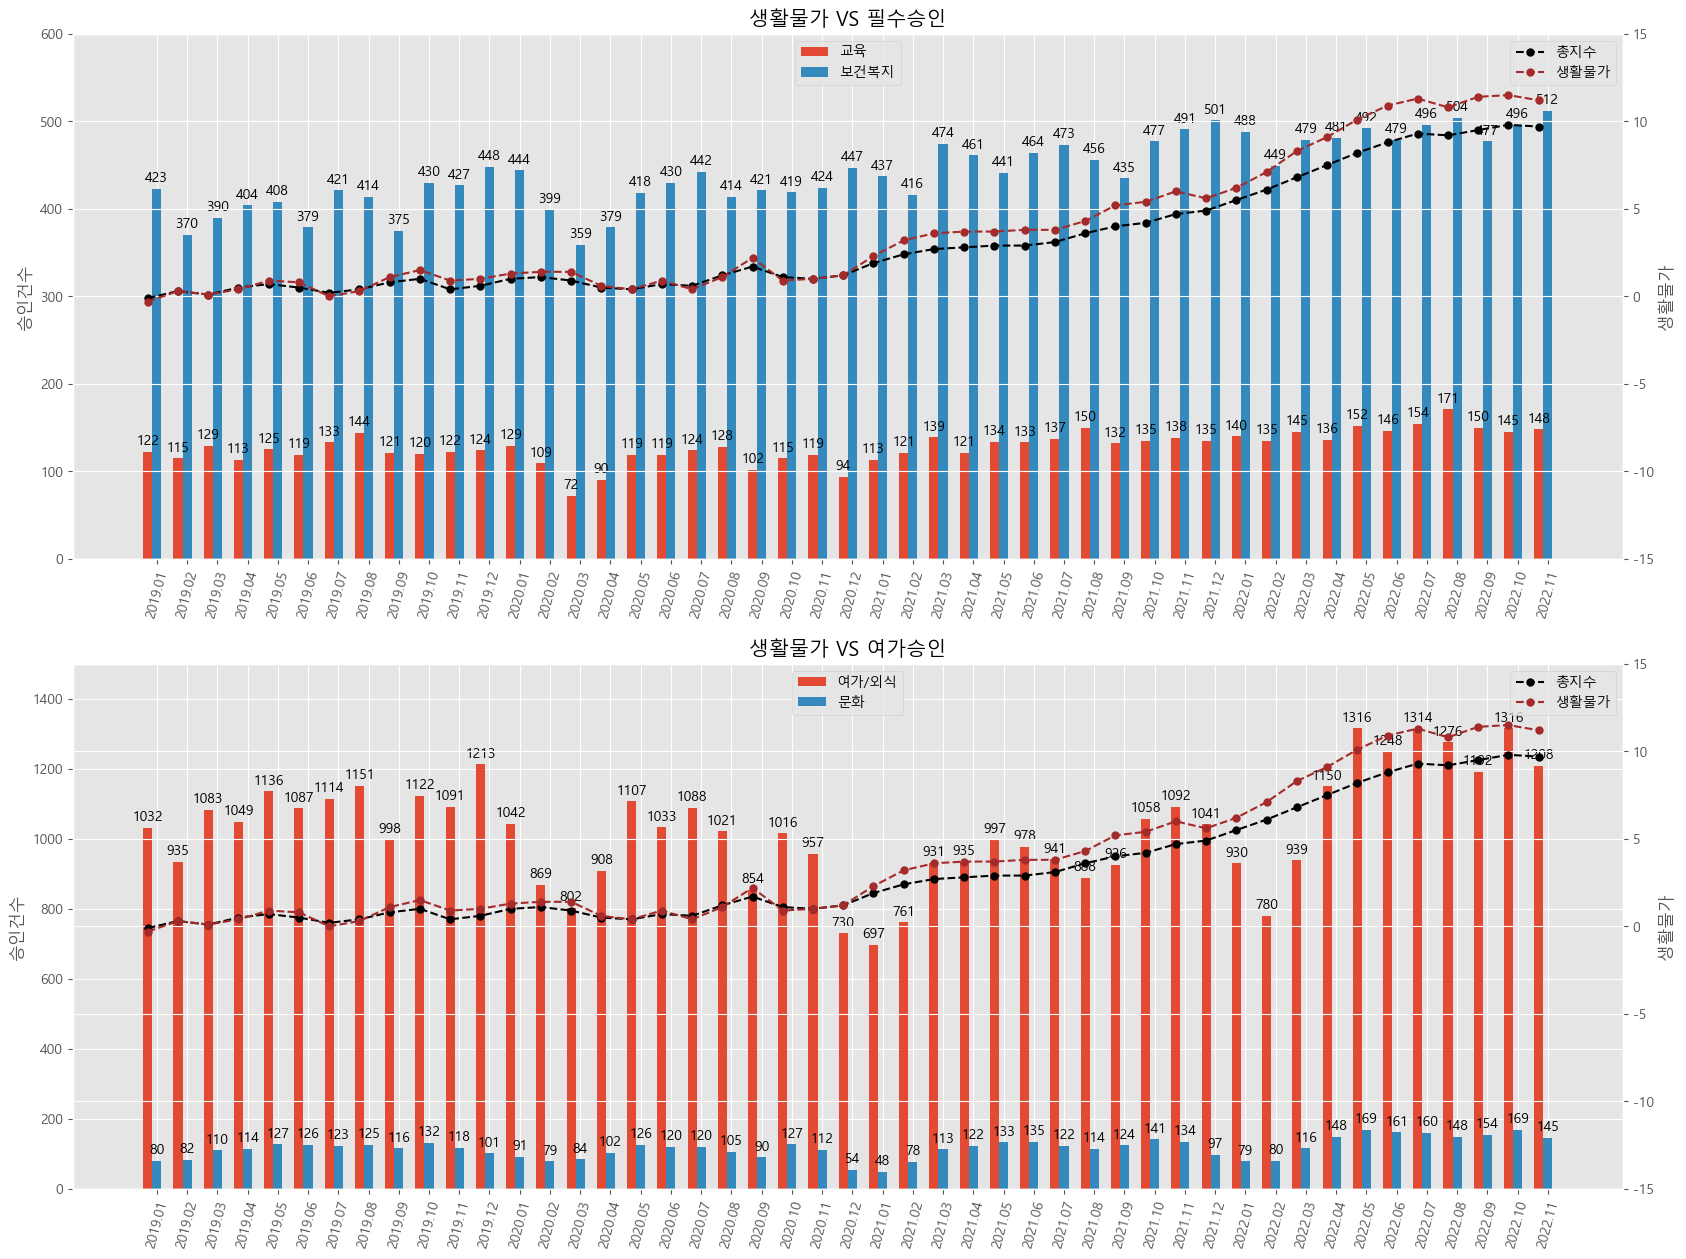

In [142]:
# print(df_idx_cum)

fig = plt.figure(figsize=(20, 15))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
ax1_2 = ax1.twinx()
ax2_2 = ax2.twinx()

gd1 = GraphDraw(ax1, ax1_2, df_app, df_idx_cum, 0, 600, '생활물가 VS 필수승인')
gd2 = GraphDraw(ax2, ax2_2, df_ap2, df_idx_cum, 0, 1500, '생활물가 VS 여가승인')
draw_graph(gd1)
draw_graph(gd2)

plt.style.use('ggplot')

plt.show()